# Learning the Handwritten Digits

You're going to build a model on the digits dataset, a sample dataset that comes pre-loaded with scikit learn. The digits dataset consist of 8x8 pixel handwritten digits from 0 to 9:

<img src='data/digs.png' width="600" height="300" align="center"/>

You want to distinguish between each of the 10 possible digits given an image, so we are dealing with multi-class classification.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (10, 8)

In [3]:
X = np.load('Digits/digits_pixels.npy')
y = np.load('Digits/digits_target.npy')

In [4]:
y = to_categorical(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
X_train.shape

(1257, 64)

In [7]:
y_train.shape

(1257, 10)

In [8]:
X_train

array([[ 0.,  0.,  2., ...,  6.,  0.,  0.],
       [ 0.,  1., 12., ...,  4.,  0.,  0.],
       [ 0.,  2., 12., ..., 15.,  3.,  0.],
       ...,
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       [ 0.,  0.,  8., ...,  0.,  0.,  0.],
       [ 0.,  0.,  5., ..., 10.,  0.,  0.]])

In [9]:
# Instantiate a Sequential model
model = keras.Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu 
model.add(keras.layers.Dense(16, input_shape = (64,), activation = 'relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile your model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Test if your model is well assembled by predicting before training
print(model.predict(X_train))

[[2.05751171e-12 1.98997711e-11 1.34604886e-06 ... 7.02296693e-11
  8.35544267e-14 9.20600314e-07]
 [1.55926727e-09 3.18588850e-10 1.28818443e-04 ... 7.47401530e-10
  2.11429324e-05 3.72808245e-06]
 [3.05174530e-09 1.13028116e-04 4.60032150e-02 ... 7.26054106e-10
  5.51081136e-08 1.79474847e-03]
 ...
 [8.18240709e-16 1.13627361e-17 4.15637480e-08 ... 1.75668901e-13
  8.19149690e-08 3.44483451e-05]
 [5.95816396e-10 2.74607059e-10 5.34245664e-05 ... 4.53113502e-09
  1.87081710e-08 1.96563869e-05]
 [8.40130021e-10 3.63650457e-07 1.81590417e-06 ... 4.58527730e-11
  5.30120822e-15 7.23735116e-09]]


2022-01-18 18:11:37.494524: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-18 18:11:37.494841: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-18 18:11:37.554862: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


**Tip:** Predicting on training data inputs before training can help you quickly check that your model works as expected!

### Is the model overfitting?

In [10]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')

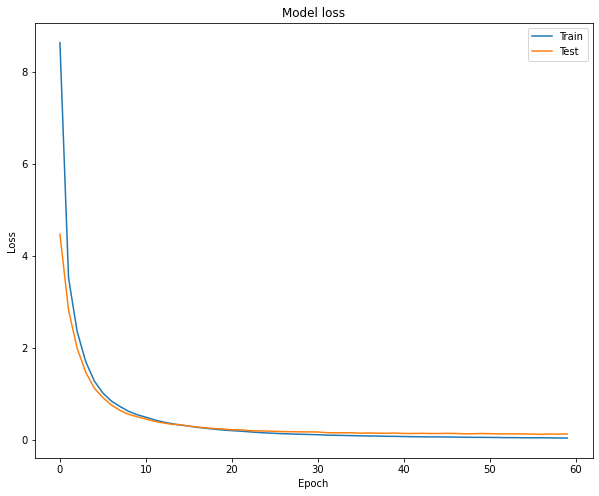

In [11]:
# Train your model for 60 epochs, using X_test and y_test as validation data
h_callback = model.fit(X_train, y_train, epochs = 60, validation_data = (X_test, y_test), verbose=0)

# Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

We can see that while it doesn't appear that the model certainly isn't improving significantly anymore at around 60 epochs, it also does *not* appear to be overfitting. Could the model benefit from more training examples? Let's find out.

### Do we need more data?
Train your model on the different training sizes and evaluate the results on `X_test`. End by plotting the results with `plot_results()`.


In [12]:
def plot_results(train_accs,test_accs):
    plt.plot(training_sizes, train_accs, 'o-', label="Training Accuracy")
    plt.plot(training_sizes, test_accs, 'o-', label="Test Accuracy")
    plt.title('Accuracy vs Number of training samples')
    plt.xlabel('# of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")

In [13]:
initial_weights = model.get_weights()

In [14]:
early_stop = EarlyStopping(monitor='loss', patience=1)
train_accs, test_accs = [], []
training_sizes = [125, 502, 879, 1255]

In [15]:
for size in training_sizes:
  	# Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    # Reset the model to the initial weights and train it on the new training data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop])

    # Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train_frac, y_train_frac)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])

Epoch 1/50
4/4 [==============================] - 0s 891us/step - loss: 0.0246 - accuracy: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 997us/step - loss: 0.0178 - accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 984us/step - loss: 0.0168 - accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 1.0000
Epoch 9/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 10/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 1.0000
Epoch 11/50
4/4 [================

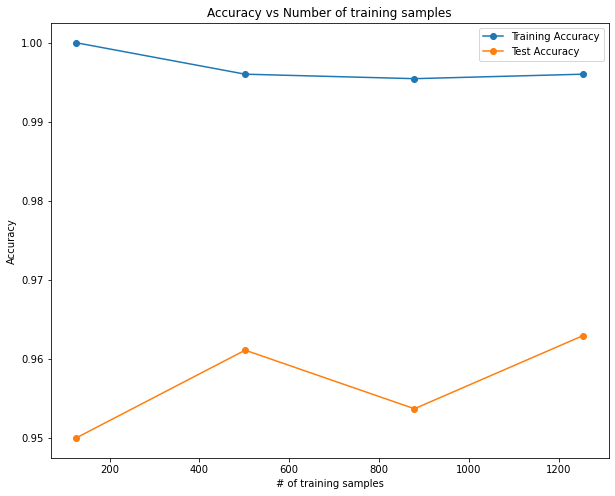

In [16]:
# Plot train vs test accuracies
plot_results(train_accs, test_accs)

The results suggest that your model would not benefit much from more training data, since the test set accuracy is already starting to flatten. It's time to look at activation funtions!